In [1]:
from train import train_model
from utils import load_config, load_model, inference
from utils import visualize_output, get_keypoints_from_heatmaps
import cv2
import numpy as np
from dataset import PoseDataset
import torch
import matplotlib.pyplot as plt

In [24]:
config1 = load_config('./configs/config_w48_384x288.yaml')
config1['model']['num_joints'] = 17
config2 = load_config('./configs/config_w48_384x288.yaml')
config2['model']['weights'] = 'runs/20240921_104625/checkpoint_epoch_5/weights_epoch_5.pth'
config2['model']['num_joints'] = 34

In [8]:
config1 = load_config('./configs/config_w48_384x288.yaml')

config2 = load_config('./configs/config_w48_384x288.yaml')
config2['model']['weights'] = 'runs/20240920_111448/checkpoint_epoch_5/weights_epoch_5.pth'

In [19]:
config1 = load_config('./configs/config_ViT_B_simple.yaml')
config1['model']['num_joints'] = 17

config2 = load_config('./configs/config_ViT_B_simple.yaml')
config2['model']['weights'] = 'runs/20240921_135316/checkpoint_epoch_5/weights_epoch_5.pth'
config2['model']['num_joints'] = 34

In [21]:
config1 = load_config('./configs/config_ViT_B_classic.yaml')

config2 = load_config('./configs/config_ViT_B_classic.yaml')
config2['model']['weights'] = 'runs/20240920_133617/checkpoint_epoch_5/weights_epoch_5.pth'

In [2]:
config1 = load_config('./config_w48_768x576.yaml')

config2 = load_config('./config_w48_768x576.yaml')
config2['model']['weights'] = 'runs/20240919_145308/checkpoint_epoch_5/weights_epoch_5.pth'


In [25]:
img_size = config1['dataset']['preprocess']['input_size']
img_size = (img_size[1], img_size[0])

n = 5
dataset = PoseDataset(config1["dataset"], config1["dataset"]['val'])

# get n random images
samples = []
images = []
for i in range(n):
    idx = np.random.randint(0, len(dataset))
    image,target,keypoints_gt,keypoint_visibility = dataset[idx]
    samples.append((image,target,keypoints_gt,keypoint_visibility))
    images.append(image)

images = torch.stack(images)

In [26]:
result1 = inference(config1, images)
keypoints1 = get_keypoints_from_heatmaps(result1, img_size)
result2 = inference(config2, images)
keypoints2 = get_keypoints_from_heatmaps(result2, img_size)

In [27]:
def show_result(image, keypoints1, keypoints2, keypoints_gt):
    image_show = image.permute(1,2,0).numpy().copy()

    keypoints1 = keypoints1.numpy()
    keypoints2 = keypoints2.numpy()


    for i in range(keypoints1.shape[0]):
        cv2.circle(image_show, (int(keypoints1[i][0]), int(keypoints1[i][1])), 2, (0,0,255), -1)

    for i in range(len(keypoints_gt)):
        cv2.circle(image_show, (int(keypoints_gt[i][0]), int(keypoints_gt[i][1])), 3, (0,255,0), -1)

    for i in range(keypoints2.shape[0]):
        cv2.circle(image_show, (int(keypoints2[i][0]), int(keypoints2[i][1])), 2, (255,0,0), -1)

    # add labels
    cv2.putText(image_show, 'Ground Truth', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)
    cv2.putText(image_show, 'Predicted 1', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)
    cv2.putText(image_show, 'Predicted 2', (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1)

    # show image in notebook cell with matplotlib
    plt.imshow(image_show)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


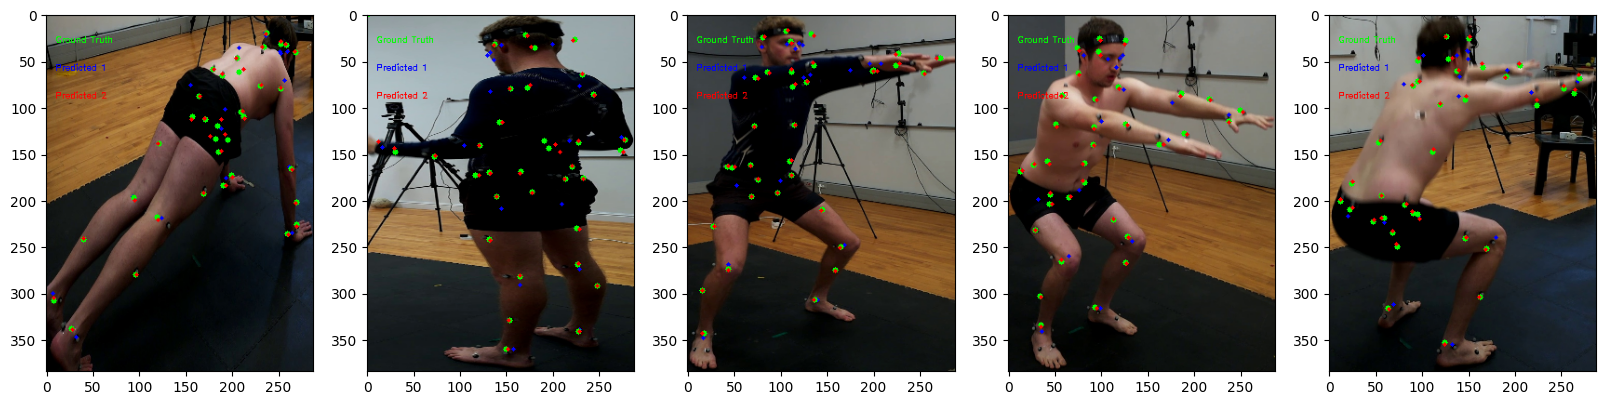

In [28]:
# show samples in grid
plt.figure(figsize=(20, 10))
for i, (image, target, keypoints_gt, keypoint_visibility) in enumerate(samples):
    plt.subplot(1, n, i+1)
    show_result(image, keypoints1[i], keypoints2[i], keypoints_gt)
plt.show()